In [1]:
## Setup ##

import re
import numpy as np
import pandas as pd
from imp import reload

# Import tsne code from util sibling directory
import sys
sys.path.insert(0, '../util')
import tsne

# Define path for saved hidden reps
hidden_path = './TrainedModels/hiddens.csv'

In [2]:
## Load gene name mappings ##

# Delete csv version if it already exists
%rm ../data/tentative_genename_mapping.csv

# Open tab version and write to csv
with open('../data/tentative_genename_mapping.tab', 'rb') as original_file:
    for i, line in enumerate(original_file):
        with open('../data/tentative_genename_mapping.csv', 'a') as new_file:
            line = re.sub(b'\t', b',', line)
            new_file.write(line.decode("utf-8"))

# Read and parse csv
match = pd.read_csv('../data/tentative_genename_mapping.csv')
beginning, counts = np.unique([to.split('_')[0][:3] for to in match['To']], return_counts=True)
name_count_pairs = sorted(zip(beginning, counts), key=lambda x: x[1], reverse=True)
genes_to_plot = [name for name, count in name_count_pairs[:10]]

In [3]:
## Match hidden reps with gene names ##

hiddens = pd.read_csv(hidden_path, index_col=0)
hiddens['name1'] = [name.split('.')[0] for name in hiddens.name]
matched = pd.merge(hiddens, match, left_on='name1', right_on='From')

In [4]:
## Get ready to plot ##

matched['genID'] = [to[:3] for to in matched['To']]
hiddens_to_plot = matched.drop(['name','name1', 'From', 'To'], 1)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.068s...
[t-SNE] Computed neighbors for 10000 samples in 20.788s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.705956
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.289391
[t-SNE] Error after 2000 iterations: 1.055678


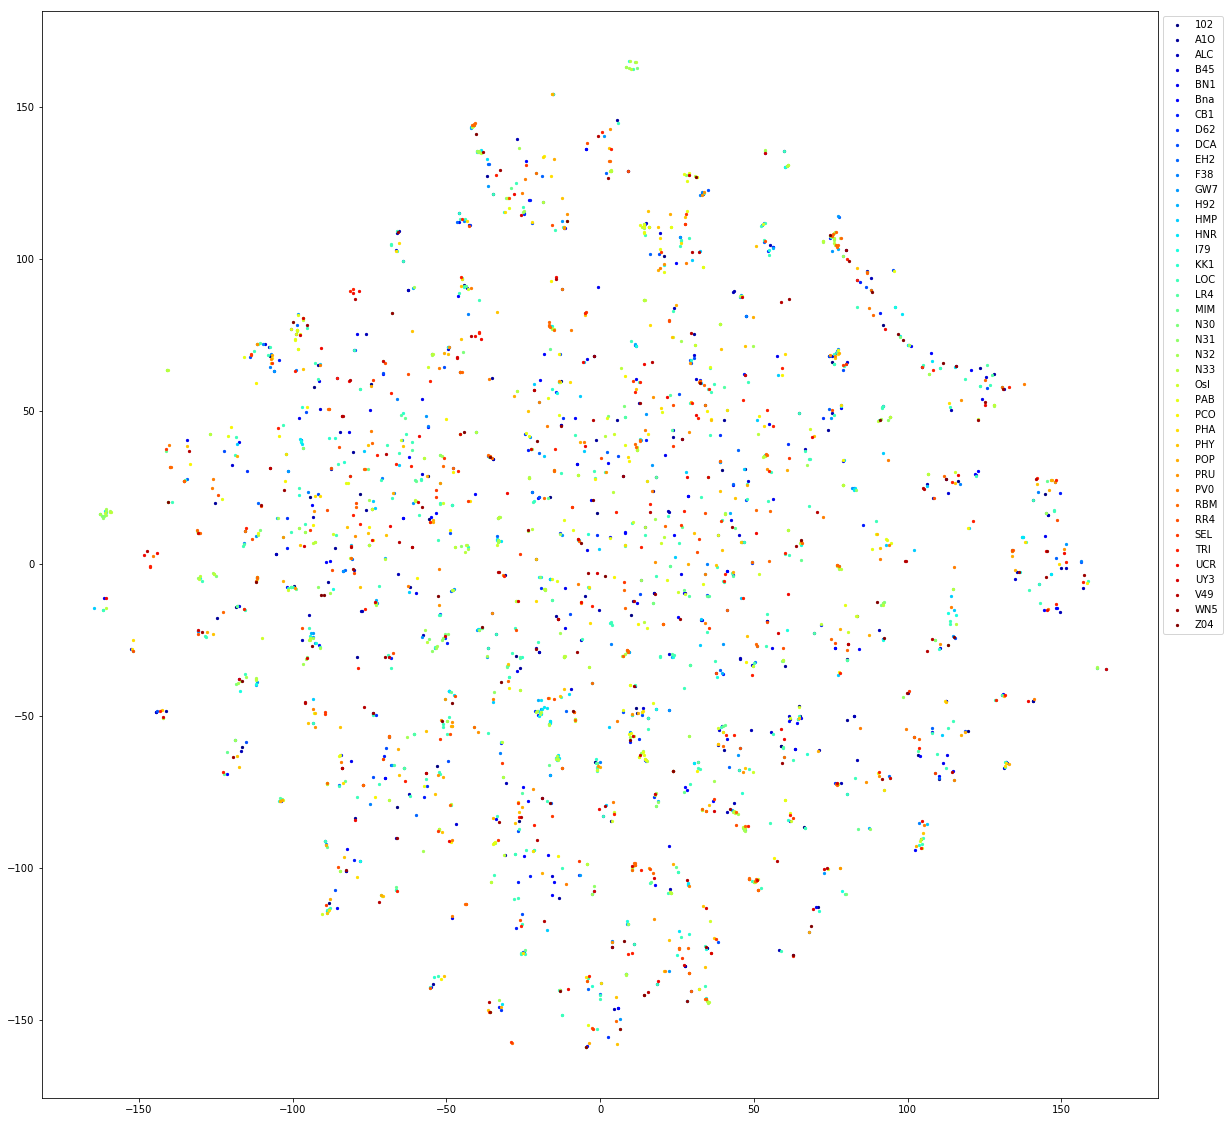

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.088s...
[t-SNE] Computed neighbors for 10000 samples in 27.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.220584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.312866
[t-SNE] Error after 2000 iterations: 0.870274


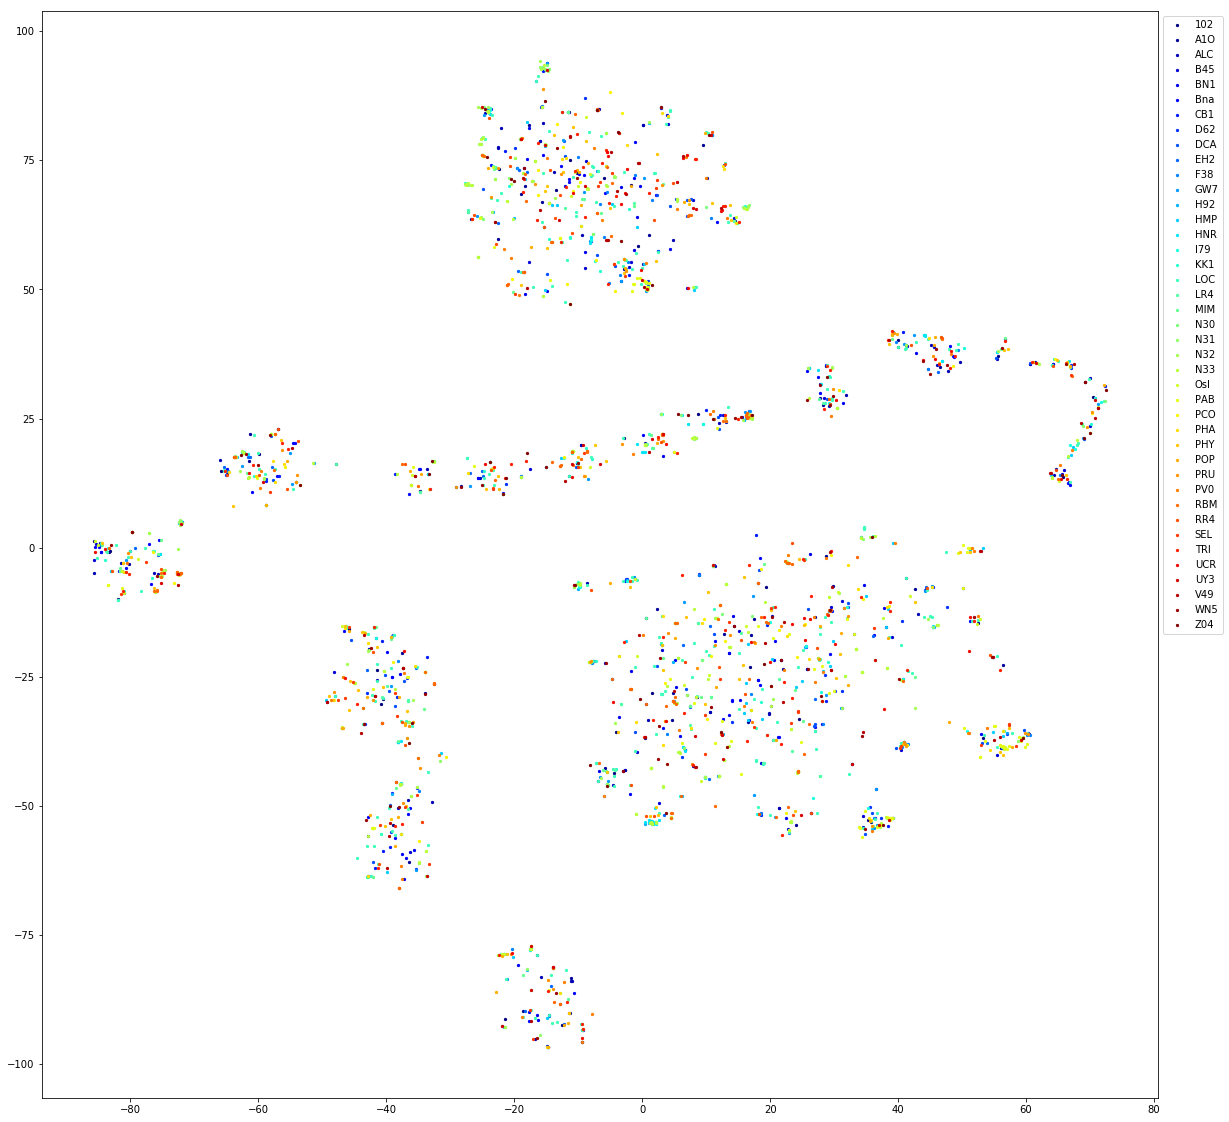

In [5]:
## Plot with various perplexities ##

for p in [10, 100]:
    reload(tsne)
    tsne.plot('Perplexity {}'.format(p), hiddens_to_plot['genID'],
              hiddens_to_plot.drop('genID', 1).values, perplexity=p)